In [119]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle
from glob import glob
from scipy.misc import imread
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import cv2

%matplotlib inline

In [120]:
with open('../data/data.p', 'rb') as f:
    data = pickle.load(f)

In [121]:
X_train, y_train = data['train']

In [122]:
print('Length X_train', len(X_train))
print('Length y_train', len(y_train))

Length X_train 20574
Length y_train 20574


In [123]:
cars = X_train[y_train==1]

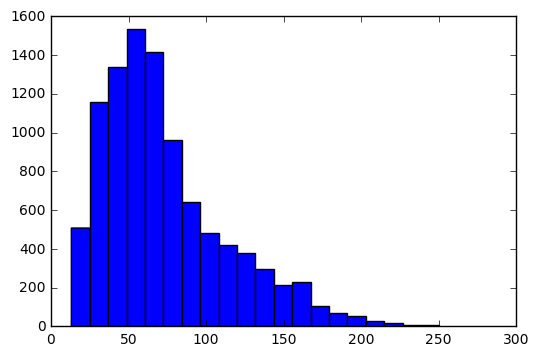

In [124]:
_ = plt.hist(np.mean(cars[:, 16:48, 16:48], axis=(1,2,3)), bins=20)

In [125]:
wht_filter = np.mean(cars[:, 16:48, 16:48], axis=(1,2,3)) > 130

In [126]:
X_train = np.concatenate((X_train, cars[wht_filter]), axis=0)
y_train = np.concatenate((y_train, np.ones(len(cars[wht_filter]))), axis=0)

In [127]:
print('Length X_train', len(X_train))
print('Length y_train', len(y_train))

Length X_train 21656
Length y_train 21656


In [128]:
data['train'] = (X_train, y_train)

In [129]:
with open('../data/data_adj.p', 'wb') as f:
    pickle.dump(data, f)